In [4]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [5]:
#load the dataset
df = pd.read_csv('stroke dataset.csv')

In [6]:
# accessing the dataframe with variable df
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.shape  #5110-rows and 12 columns

(5110, 12)

In [8]:
df.info()  #checking the information of dataset, all the columns are in the required format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.isnull().sum() # 201 null values in bmi column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.describe()  #the min and max range of values in each column is different therefore there is a need of feature scaling
               #& also it gives information about mean,median,IQR, st.dev of numerical columns

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.corr()  #checking corelation and multicollinearity

C:\Users\User\AppData\Local\Temp\ipykernel_13616\2394978656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()  #checking corelation and multicollinearity


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_13616\2329461524.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)  #visualisation of correlation with the help of heatmap


<Axes: >

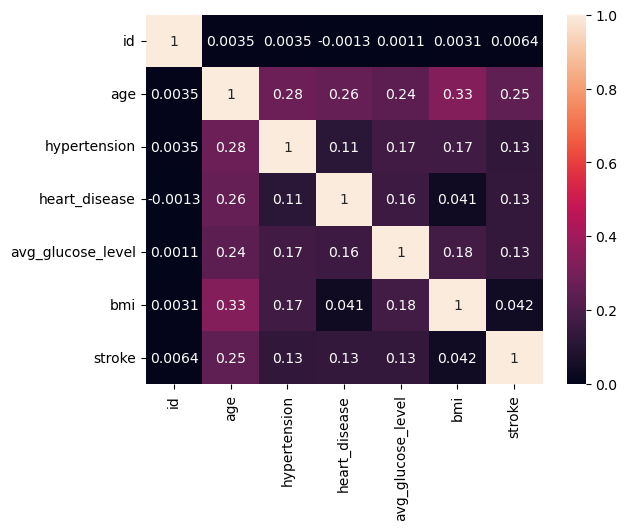

In [12]:
sns.heatmap(df.corr(),annot=True)  #visualisation of correlation with the help of heatmap

# Exploratory Data Analysis(EDA)

### UNIVARIATE ANALYSIS

In [13]:
df.drop('id', axis=1, inplace=True)  #drop the id column because it does not show any correlation with all the features

In [14]:
df['gender'].value_counts() #more no. of females as compared to males

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

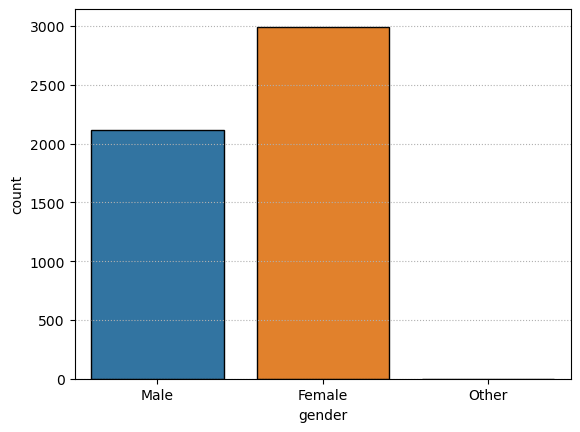

In [15]:
sns.countplot(x=df['gender'],edgecolor='black')
plt.rcParams['figure.figsize']=(6,4)
plt.grid(axis='y', linestyle='dotted')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13616\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

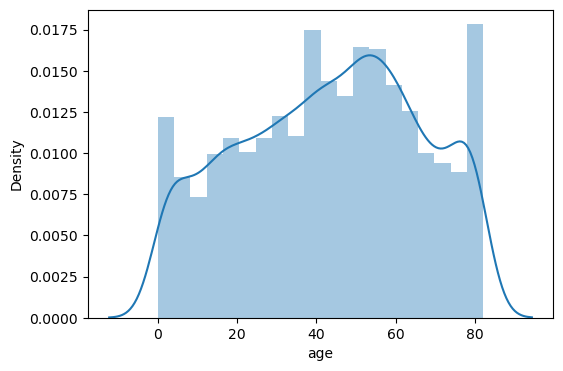

In [16]:
sns.distplot(df['age'])

In [17]:
df['age'].skew() #a bit left skewed data in age column

-0.1370593225984694

In [18]:
df['age'].mean() #mean of age is 43

43.226614481409

In [19]:
df['age'].median() #median of age column is 45

45.0

In [20]:
st.stdev(df['age'])  # by compairing mean and st. deviation data points are dispersed(far away from mean)

22.61264672311349

In [21]:
st.variance(df['age'])

511.33179182433514

In [22]:
df['hypertension'].value_counts() # 1-people having hypertension, 0- not having hypertension

0    4612
1     498
Name: hypertension, dtype: int64

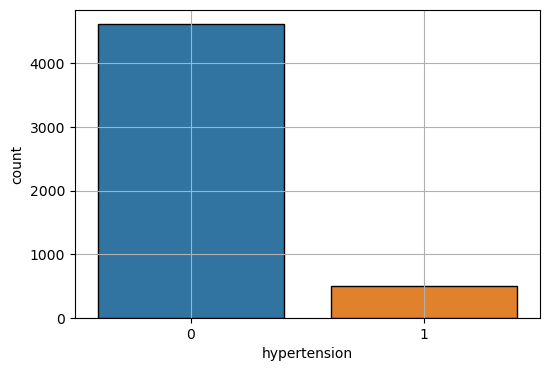

In [23]:
sns.countplot(x=df['hypertension'],edgecolor='black') #max no. of people are not suffering from hypertension
plt.grid()
plt.show()

In [24]:
df['heart_disease'].value_counts() #1-person having heart disease, 0-person not suffering from heart disease

0    4834
1     276
Name: heart_disease, dtype: int64

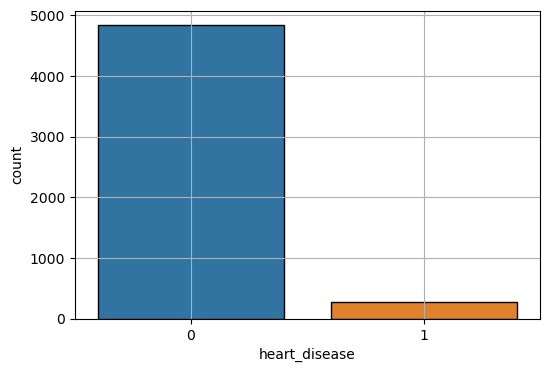

In [25]:
sns.countplot(x=df['heart_disease'],edgecolor='black')  #max no of people(4834) are those who do no have a heart disease
plt.grid()
plt.show()

In [26]:
df['ever_married'].value_counts() #there are more no of married as compared to unmarried

Yes    3353
No     1757
Name: ever_married, dtype: int64

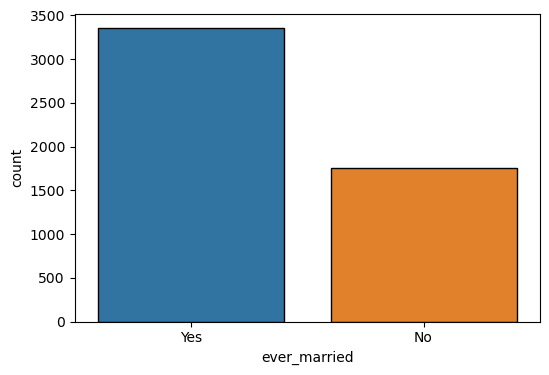

In [27]:
sns.countplot(x=df['ever_married'],edgecolor='black')
plt.show()

In [28]:
df['work_type'].value_counts() #max no of people are employed in private job  and only 22 people are those who never worked at all

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

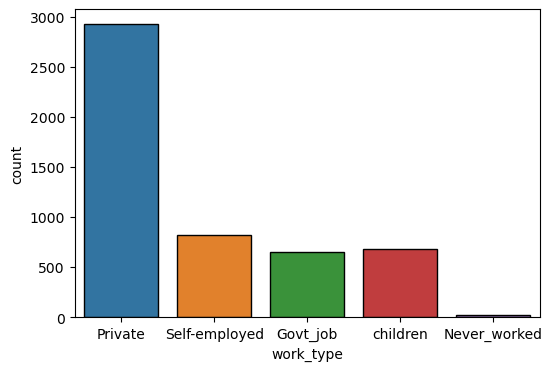

In [29]:
sns.countplot(x=df['work_type'],edgecolor='black')
plt.show()

In [30]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

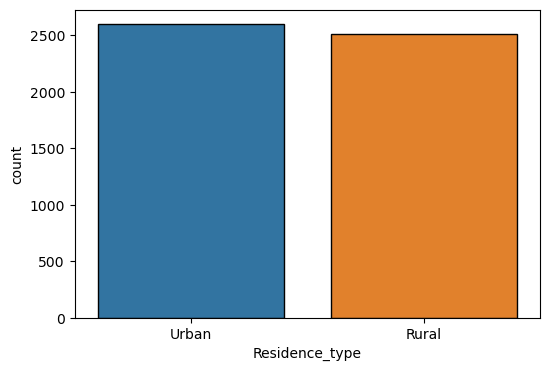

In [31]:
sns.countplot(x=df['Residence_type'],edgecolor='black')  #there are almost equal no of people who lives in urban as well as rural area
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13616\3535339131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_glucose_level'])


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

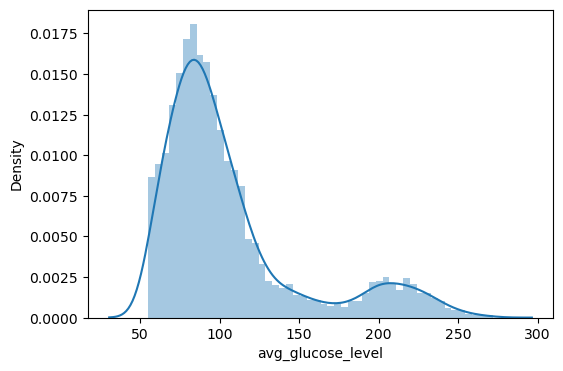

In [32]:
sns.distplot(df['avg_glucose_level'])

In [33]:
df['avg_glucose_level'].skew() #data is not normally distributed it is right skewed

1.5722838665030459

In [34]:
df['avg_glucose_level'].mean()

106.1476771037182

In [35]:
df['avg_glucose_level'].median() #mean > median also depicts that our data is right skewed

91.88499999999999

In [36]:
st.stdev(df['avg_glucose_level']) #data points are far away from the mean 

45.28356015058198

In [37]:
df['bmi'].isnull().sum() #201 null values in bmi

201

C:\Users\User\AppData\Local\Temp\ipykernel_13616\4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

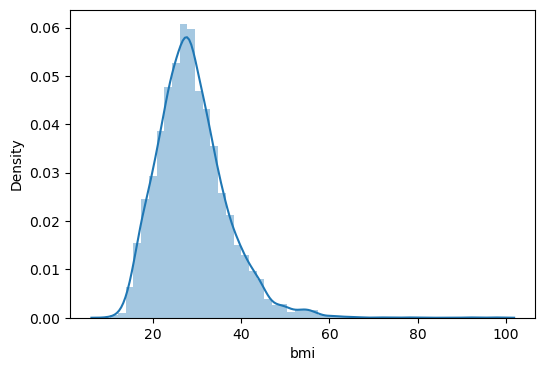

In [38]:
sns.distplot(df['bmi'])

In [39]:
df['bmi'].skew() #a bit right skewed

1.0553402052962912

In [40]:
df['bmi'].mean()

28.893236911794666

In [41]:
df['bmi'].median() #mean = median, so we can fill null values with mean or either median

28.1

In [42]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [43]:
df['bmi'].isnull().sum()

0

In [44]:
st.stdev(df['bmi']) #data points are close to the mean

7.698017826857082

In [45]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

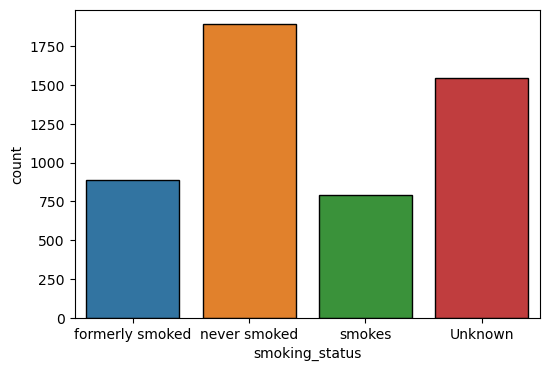

In [46]:
sns.countplot(x=df['smoking_status'],edgecolor='black')
plt.show() #max no of people are those who never smoked and 789 people are those who usually smokes

In [47]:
df['stroke'].value_counts() #only 249 people suffers from stroke

0    4861
1     249
Name: stroke, dtype: int64

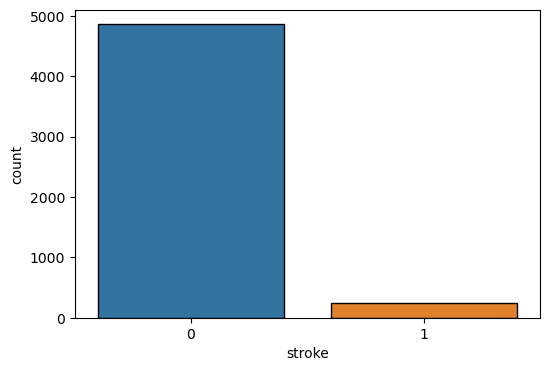

In [48]:
sns.countplot(x=df['stroke'],edgecolor='black') # 1-people having stroke and 0-not having stroke
plt.show()

### BIVARIATE & MULTIVARIATE ANALYSIS

In [53]:
#gender with stroke
pd.crosstab(df['gender'],df['stroke'])
# 141 female and 108 male are affected by stroke

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


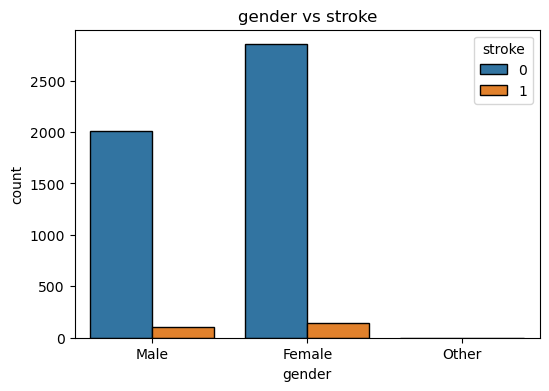

In [55]:
sns.countplot(x=df['gender'],hue=df['stroke'],edgecolor='black')  #almost same no of males and females suffers from stroke but there are more no. of females as compared to males who are not suffering from stroke
plt.title('gender vs stroke')
plt.show()

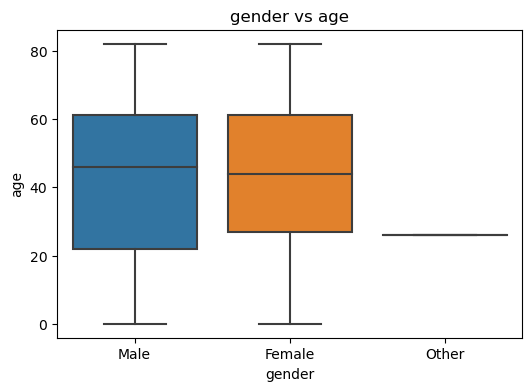

In [56]:
#gender with age
sns.boxplot(x='gender',y='age',data=df)  #median is almost same but the range is slight different
plt.title('gender vs age')
plt.show()

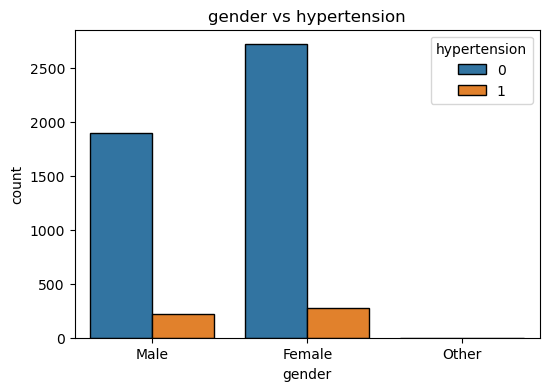

In [57]:
#gender with hypertension
sns.countplot(x=df['gender'],hue=df['hypertension'],edgecolor='black') #more no of females who's not suffering from hypertension as compared to males 
plt.title('gender vs hypertension')
plt.show()

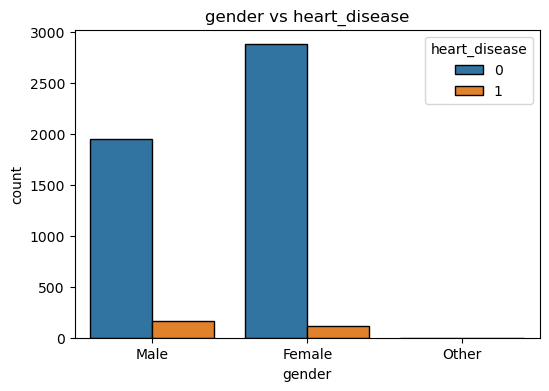

In [58]:
#gender with heart_disease
sns.countplot(x=df['gender'],hue=df['heart_disease'],edgecolor='black')  #more no of females who's not suffering from heart disease as compared to males
plt.title('gender vs heart_disease')
plt.show()

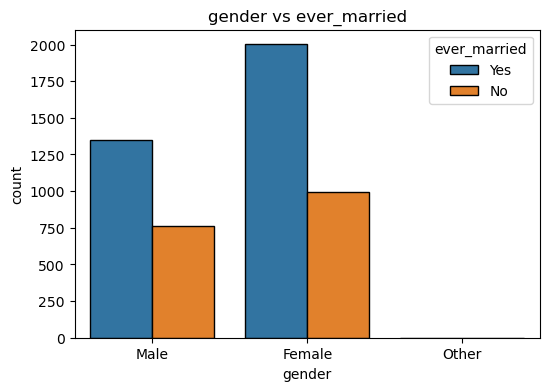

In [59]:
#gender with ever_married
sns.countplot(x=df['gender'],hue=df['ever_married'],edgecolor='black') #more no of females who are married as compared to males
plt.title('gender vs ever_married')
plt.show()

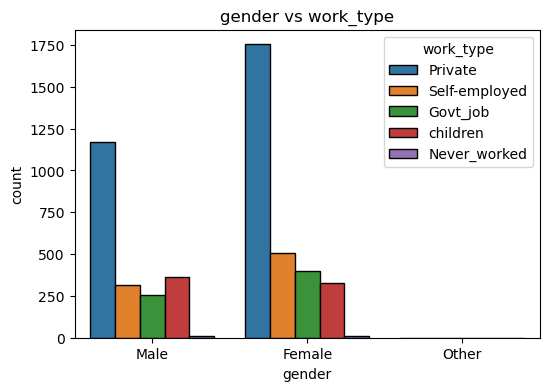

In [60]:
#gender vs work_type
sns.countplot(x=df['gender'],hue=df['work_type'],edgecolor='black') #more no of females employed in all the sectors as compared to males
plt.title('gender vs work_type')
plt.show()

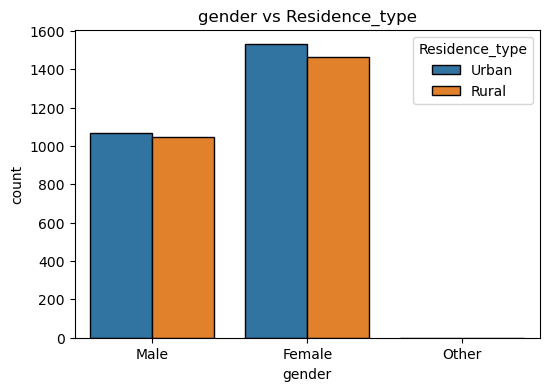

In [61]:
#gender with Residence_type
sns.countplot(x=df['gender'],hue=df['Residence_type'],edgecolor='black') #more no of females lived in rural as well as urban areas as compared to males
plt.title('gender vs Residence_type')
plt.show()

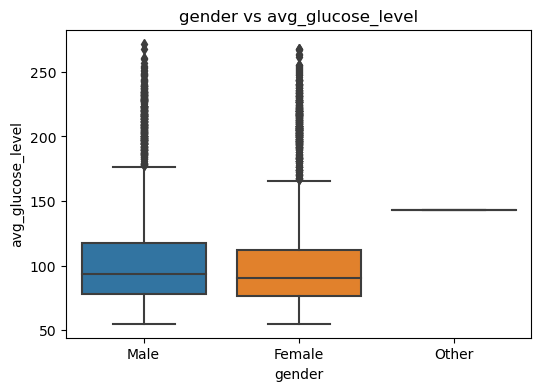

In [64]:
#gender with avg_glucose_level
sns.boxplot(x='gender',y='avg_glucose_level',data=df)  #not much effect of avg glucose level on gender column and there are outliers too
plt.title('gender vs avg_glucose_level')
plt.show()

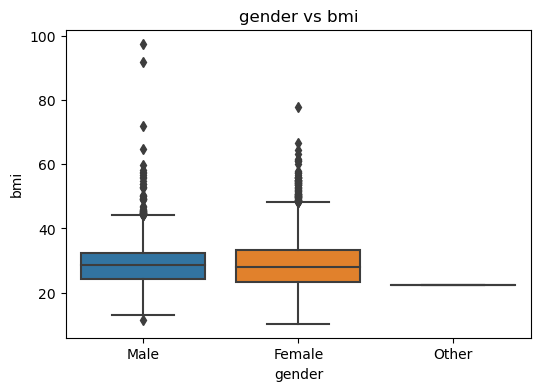

In [65]:
#gender with bmi
sns.boxplot(x='gender',y='bmi',data=df)  #not much effect of bmi on gender column and there are outliers too
plt.title('gender vs bmi')
plt.show()

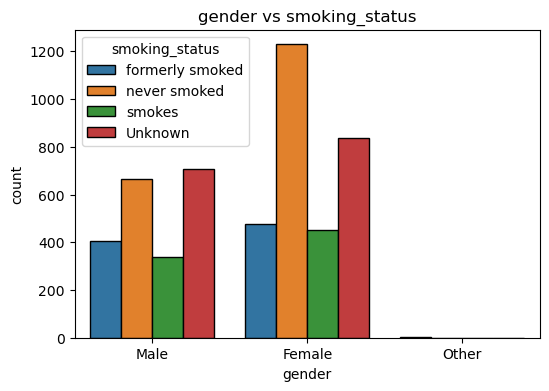

In [66]:
#gender with smoking_status
sns.countplot(x=df['gender'],hue=df['smoking_status'],edgecolor='black') #more no of females in all the cases as compared to males
plt.title('gender vs smoking_status')
plt.show()

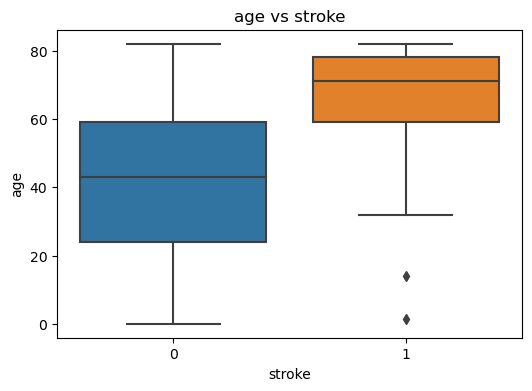

In [67]:
#age with stroke
sns.boxplot(x='stroke',y='age',data=df)  #people belong to higher age group(60-75) have higher chances of having a stroke
plt.title('age vs stroke')
plt.show()

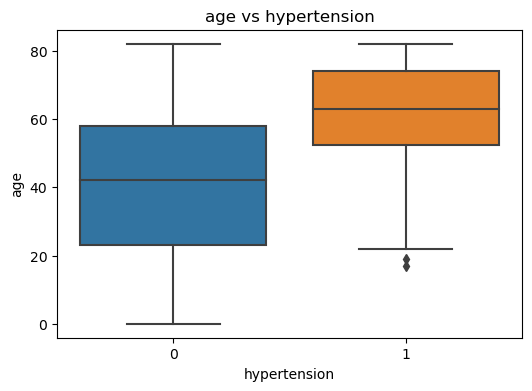

In [68]:
#age with hypertension
sns.boxplot(x='hypertension',y='age',data=df)  #people suffering from hypertension belongs to higher age group(55 to 70) and the people who are not suffering from hypertension belong to a lower age group(25 to 55)
plt.title('age vs hypertension')
plt.show()

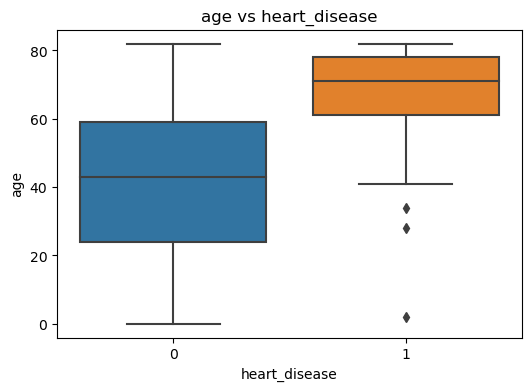

In [69]:
#age with heart_disease
sns.boxplot(x='heart_disease',y='age',data=df)  #people suffering from heart_disease belongs to higher age group(60 to 75) and the people who are not suffering from heart_disease belong to a lower age group(25 to 60)
plt.title('age vs heart_disease')
plt.show()

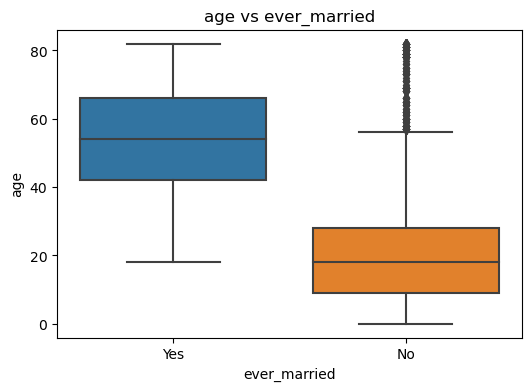

In [70]:
#age with ever_married
sns.boxplot(x='ever_married',y='age',data=df)  #married people belongs to higher age group(40 to 65) and unmarried people belongs to a lower age group(10 to 30)
plt.title('age vs ever_married')
plt.show()

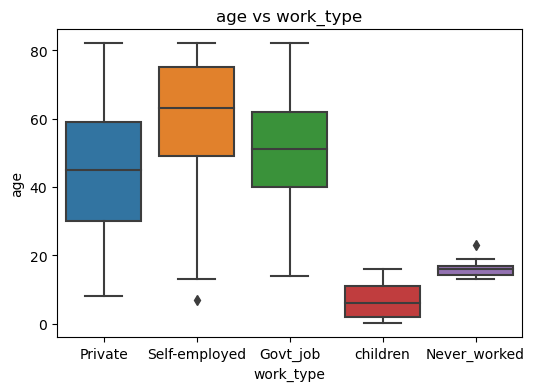

In [71]:
#age with work_type
sns.boxplot(x='work_type',y='age',data=df)  #self employed people belongs to higher age group(50 to 75) among all
plt.title('age vs work_type')
plt.show()

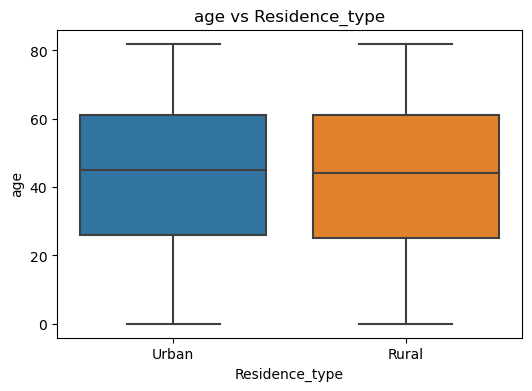

In [72]:
#age with Residence_type
sns.boxplot(x='Residence_type',y='age',data=df)  #not much effect of residence type on age
plt.title('age vs Residence_type')
plt.show()

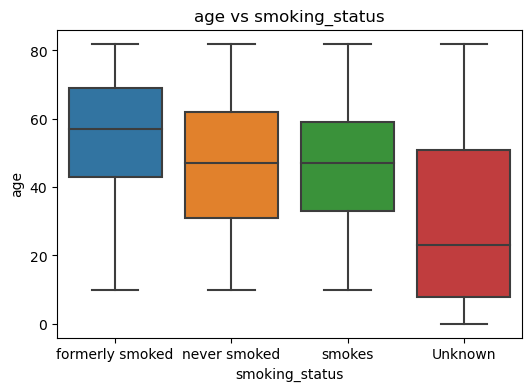

In [73]:
#age with smoking_status
sns.boxplot(x=df['smoking_status'],y=df['age'],data=df) #people who formally smoked belongs to the age group of 45 to 70
plt.title('age vs smoking_status')
plt.show()

In [74]:
#hypertension with stroke
pd.crosstab(df['hypertension'],df['stroke'])
# 183 person without hypertension and 66 person with hypertension are affected by stroke

stroke,0,1
hypertension,,
0,4429,183
1,432,66


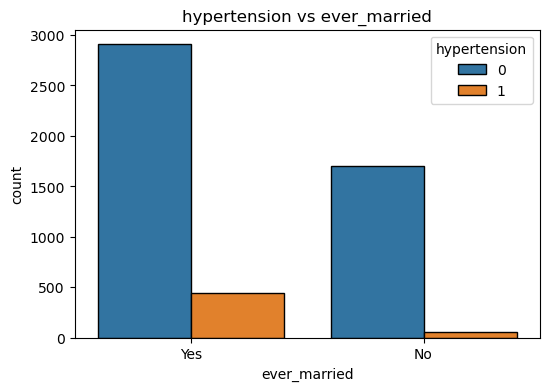

In [75]:
sns.countplot(x=df['ever_married'],hue=df['hypertension'],edgecolor='black') #the people who are married has less chances of hypertension as compared to unmarried
plt.title('hypertension vs ever_married')
plt.show()

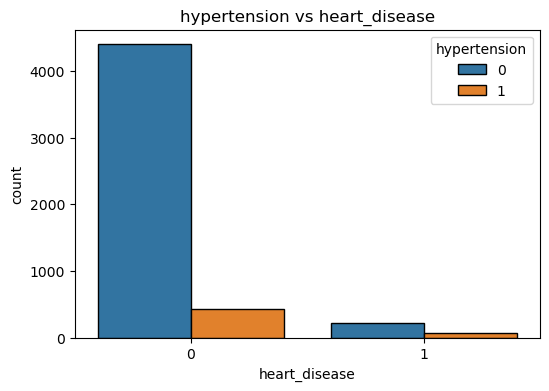

In [76]:
#hypertension with heart_disease
sns.countplot(x=df['heart_disease'],hue=df['hypertension'],edgecolor='black') #max no of people are not suffering from hypertension and they have less chances of having a heart disease
plt.title('hypertension vs heart_disease')
plt.show()

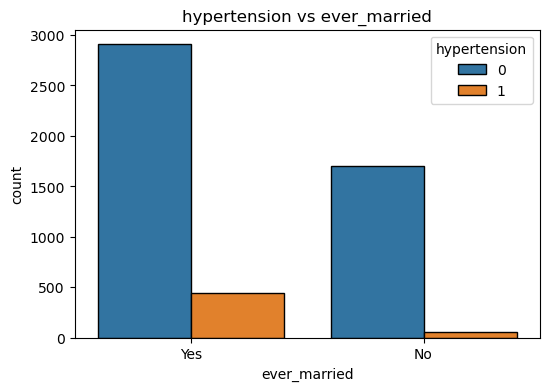

In [77]:
#hypertension with ever_married
sns.countplot(x=df['ever_married'],hue=df['hypertension'],edgecolor='black') #more no of people who are married suffering from hypertension as compared to unmarried
plt.title('hypertension vs ever_married')
plt.show()

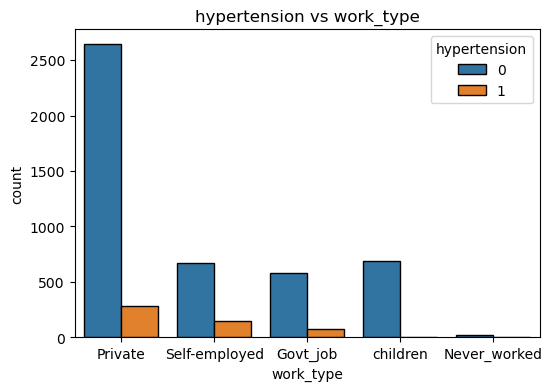

In [78]:
#hypertension with work_type
sns.countplot(x=df['work_type'],hue=df['hypertension'],edgecolor='black') #more no of people are involved in all the sectors who are not suffering from hypertension
plt.title('hypertension vs work_type')
plt.show()

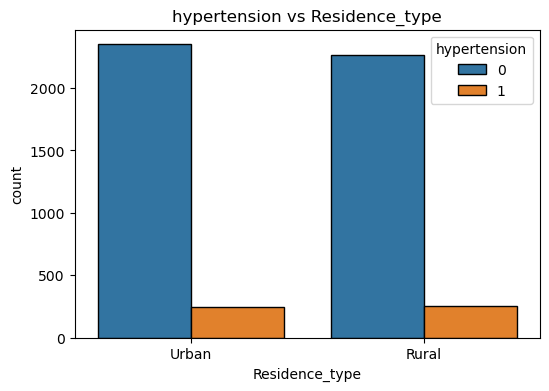

In [79]:
#hypertension with Residence_type
sns.countplot(x=df['Residence_type'],hue=df['hypertension'],edgecolor='black') #no effect of hypertension on residence type
plt.title('hypertension vs Residence_type')
plt.show()

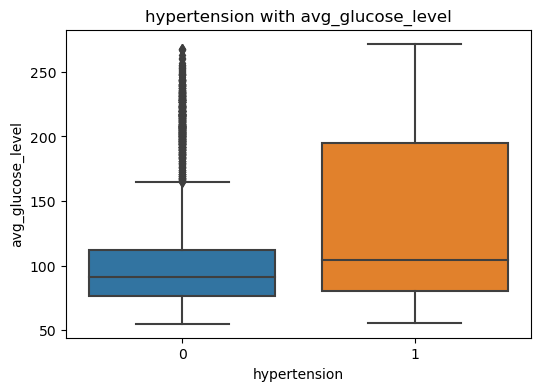

In [80]:
#hypertension with avg_glucose_level
sns.boxplot(x=df['hypertension'],y=df['avg_glucose_level'],data=df) #people with avg glucose level ranges from 75 to 180 have higher chances of having hypertension
plt.title('hypertension with avg_glucose_level')
plt.show()

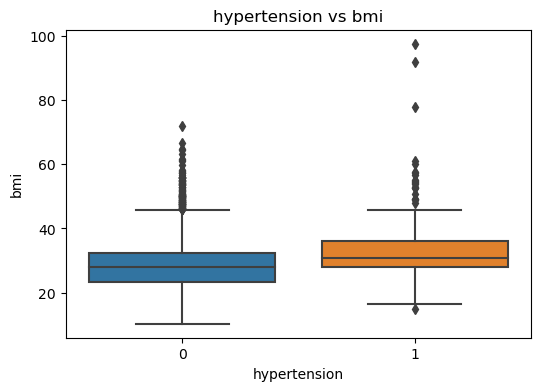

In [81]:
#hypertension with bmi
sns.boxplot(x=df['hypertension'],y=df['bmi'],data=df) #not much effect of hypertension on bmi
plt.title('hypertension vs bmi')
plt.show()

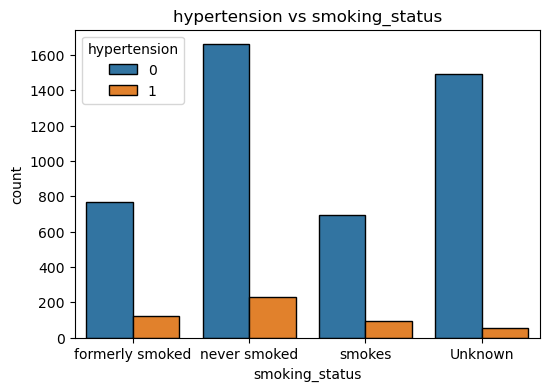

In [82]:
#hypertension with smoking_status
sns.countplot(x=df['smoking_status'],hue=df['hypertension'],edgecolor='black') #there are more no of people in every category who are not suffering from hypertension
plt.title('hypertension vs smoking_status')
plt.show()

In [83]:
#heart_disease with stroke
pd.crosstab(df['heart_disease'],df['stroke'])
# 202 person without heart disease and 47 person with heart disease are affected  with stroke

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


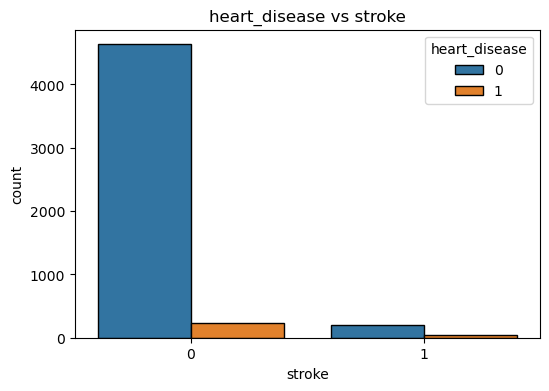

In [84]:
sns.countplot(x=df['stroke'],hue=df['heart_disease'],edgecolor='black') #people who does not have heart disease are not suffering from stroke
plt.title('heart_disease vs stroke')
plt.show()

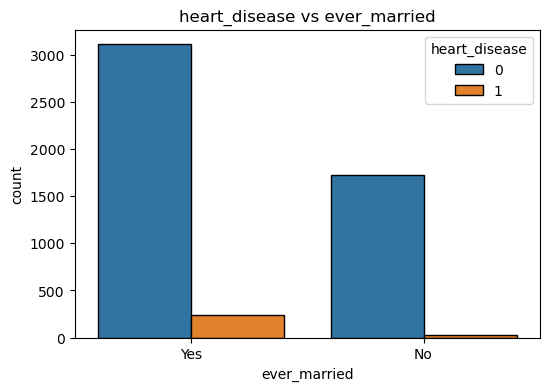

In [85]:
#heart_disease with ever_married
sns.countplot(x=df['ever_married'],hue=df['heart_disease'],edgecolor='black') #there are more no of people who are married does not have heart disease
plt.title('heart_disease vs ever_married')
plt.show()

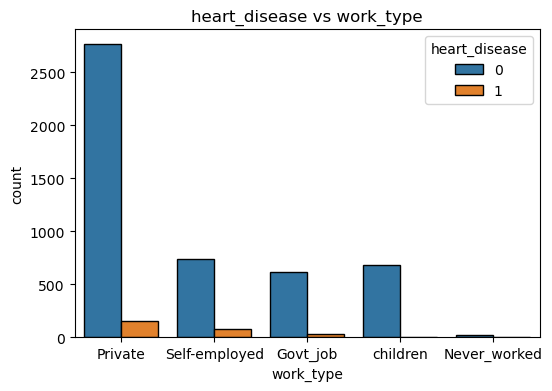

In [86]:
#heart_disease with work_type
sns.countplot(x=df['work_type'],hue=df['heart_disease'],edgecolor='black') #there are more no of people employed in all the sectors who does have a heart disease
plt.title('heart_disease vs work_type')
plt.show()

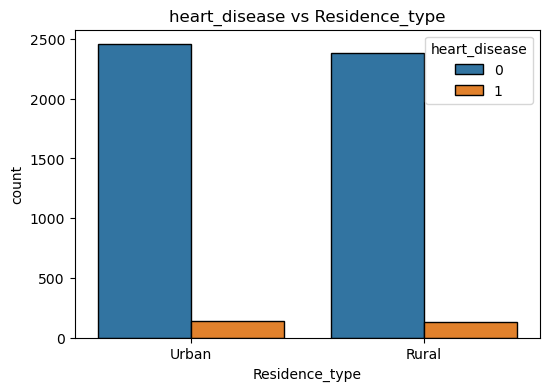

In [87]:
#heart_disease with Residence_type
sns.countplot(x=df['Residence_type'],hue=df['heart_disease'],edgecolor='black') #not much effect of heart disease on Residence_type
plt.title('heart_disease vs Residence_type')
plt.show()

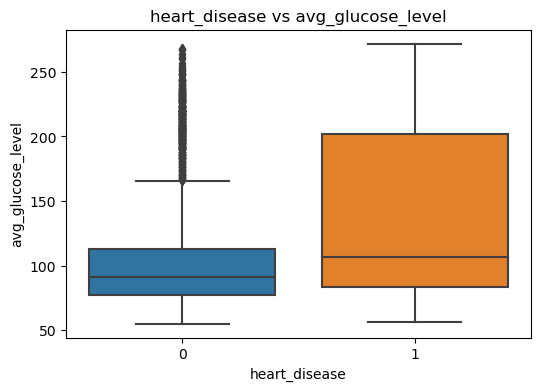

In [88]:
#heart_disease with avg_glucose_level
sns.boxplot(x=df['heart_disease'],y=df['avg_glucose_level'],data=df) #people whose avg_glucose_level ranges from 75 to 200 are more prone to heart disease
plt.title('heart_disease vs avg_glucose_level')
plt.show()

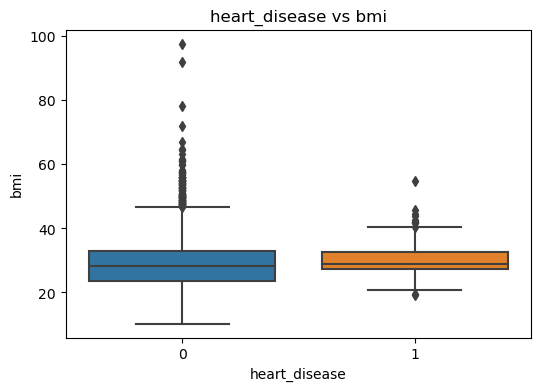

In [89]:
#heart_disease with bmi
sns.boxplot(x=df['heart_disease'],y=df['bmi'],data=df) #not much effect
plt.title('heart_disease vs bmi')
plt.show()

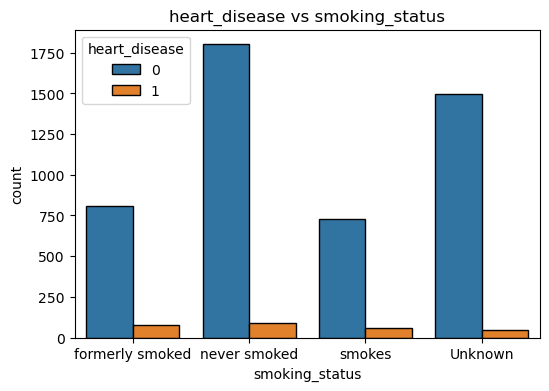

In [90]:
#heart_disease with smoking_status
sns.countplot(x=df['smoking_status'],hue=df['heart_disease'],edgecolor='black') #max no of people who never smoked does not suffer from heart disease
plt.title('heart_disease vs smoking_status')
plt.show()

In [91]:
#ever_married with stroke
pd.crosstab(df['ever_married'],df['stroke'])
# 29 not married and 220 married person affected by stroke

stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


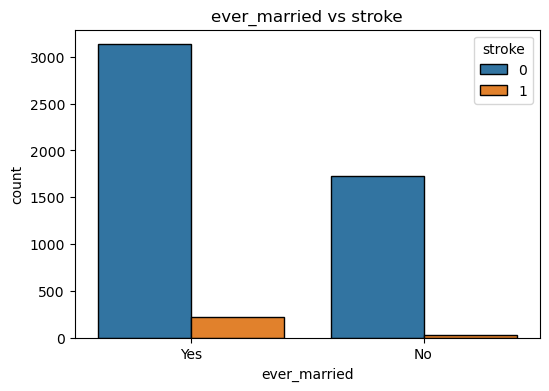

In [92]:
sns.countplot(x=df['ever_married'],hue=df['stroke'],edgecolor='black') #more no of married people does not suffer from stroke as compared to unmarried
plt.title('ever_married vs stroke')
plt.show()

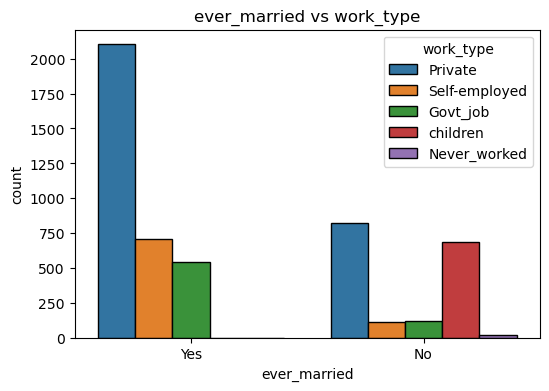

In [93]:
#ever_married with work_type
sns.countplot(x=df['ever_married'],hue=df['work_type'],edgecolor='black') #more no of married people employed in private, govt job and self-employed as compared to unmarried
plt.title('ever_married vs work_type')
plt.show()

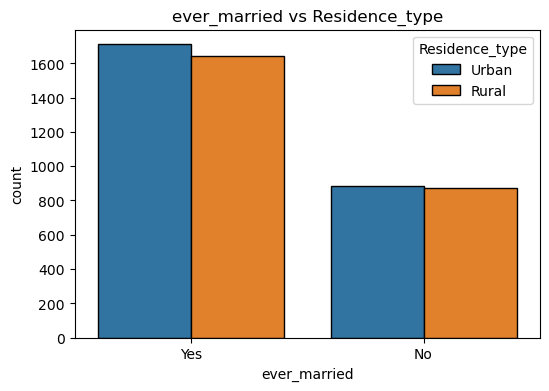

In [94]:
#ever_married with Residence_type
sns.countplot(x=df['ever_married'],hue=df['Residence_type'],edgecolor='black') #more no of married people living in urban as well as rural areas as compared to unmarried
plt.title('ever_married vs Residence_type')
plt.show()

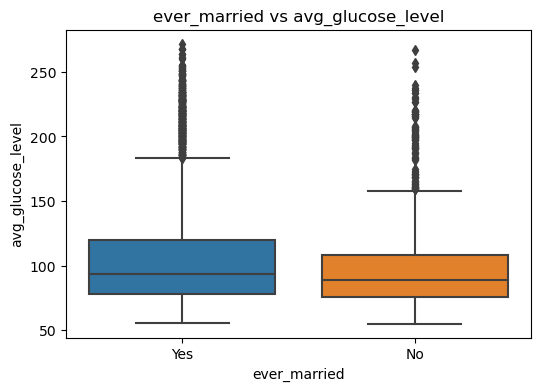

In [95]:
#ever_married with avg_glucose_level
sns.boxplot(x=df['ever_married'],y=df['avg_glucose_level'],data=df) #not much effect
plt.title('ever_married vs avg_glucose_level')
plt.show()

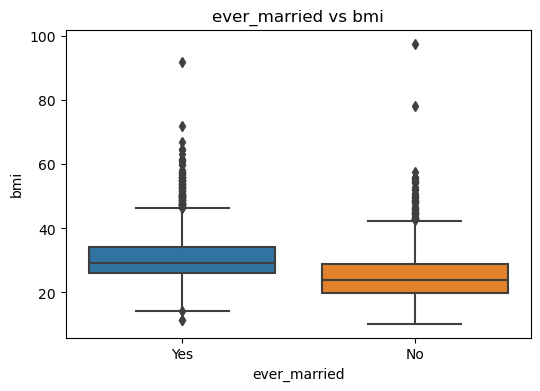

In [96]:
#ever_married with bmi
sns.boxplot(x=df['ever_married'],y=df['bmi'],data=df) #not much effect
plt.title('ever_married vs bmi')
plt.show()

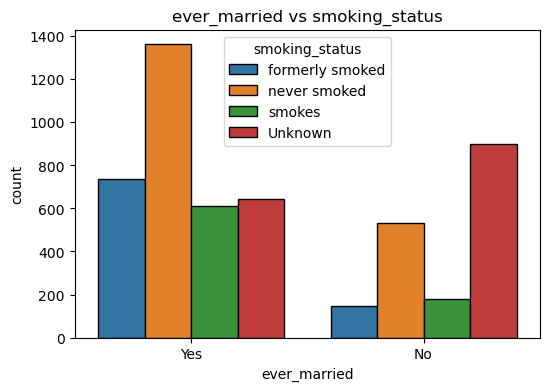

In [97]:
#ever_married with smoking_status
sns.countplot(x=df['ever_married'],hue=df['smoking_status'],edgecolor='black') #more no of married people indulging in these activities as compared to unmarried
plt.title('ever_married vs smoking_status')
plt.show()

In [98]:
#work_type with stroke
pd.crosstab(df['work_type'],df['stroke'])
# 33 Govt_job, 149 private job, 65 self employed members and 2 childern affected by stroke

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


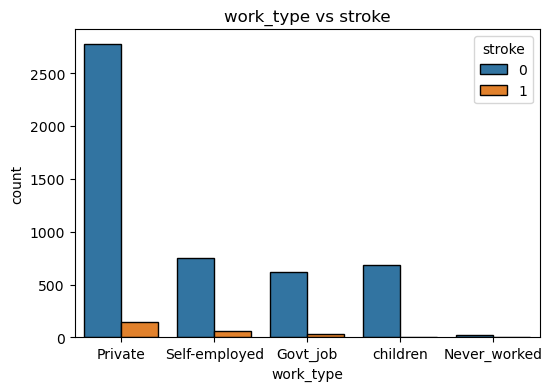

In [99]:
sns.countplot(x=df['work_type'],hue=df['stroke'],edgecolor='black') #less chcnces of having a stroke for people who employed in private sector
plt.title('work_type vs stroke')
plt.show()

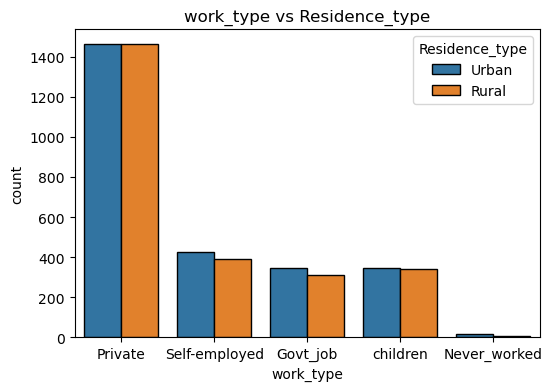

In [100]:
#work_type with Residence_type
sns.countplot(x=df['work_type'],hue=df['Residence_type'],edgecolor='black') #almost same
plt.title('work_type vs Residence_type')
plt.show()

In [101]:
#work_type with avg_glucose_level
sns.countplotplot(x=df['work_type'],y=df['avg_glucose_level'],data=df) #not much effect
plt.title('work_type vs avg_glucose_level')
plt.show()

AttributeError: module 'seaborn' has no attribute 'countplotplot'

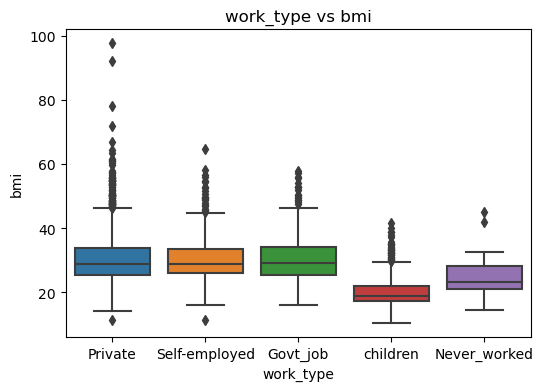

In [102]:
#work_type with bmi
sns.boxplot(x=df['work_type'],y=df['bmi'],data=df) #not much effect
plt.title('work_type vs bmi')
plt.show()

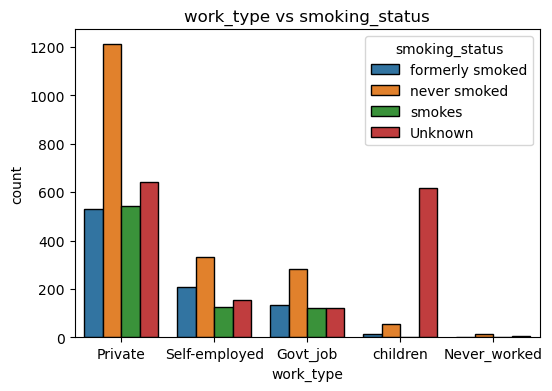

In [103]:
#work_type with smoking_status
sns.countplot(x=df['work_type'],hue=df['smoking_status'],edgecolor='black') #people who are employed in private sector are more involved in these activities
plt.title('work_type vs smoking_status')
plt.show()

In [104]:
#Residence_type with stroke
pd.crosstab(df['Residence_type'],df['stroke'])
# 114 rural and 135 urban living person affected by stroke

stroke,0,1
Residence_type,,
Rural,2400,114
Urban,2461,135


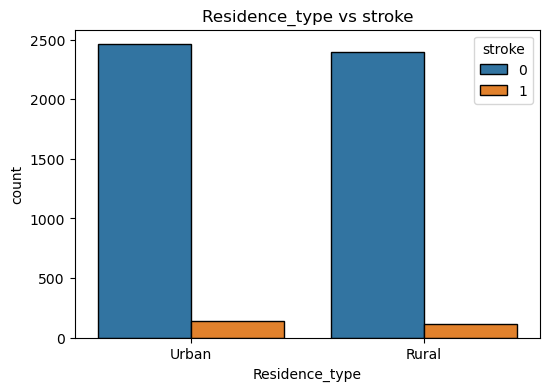

In [105]:
sns.countplot(x=df['Residence_type'],hue=df['stroke'],edgecolor='black') #almost same
plt.title('Residence_type vs stroke')
plt.show()

In [106]:
#smoking_status with stroke
pd.crosstab(df['smoking_status'],df['stroke'])

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


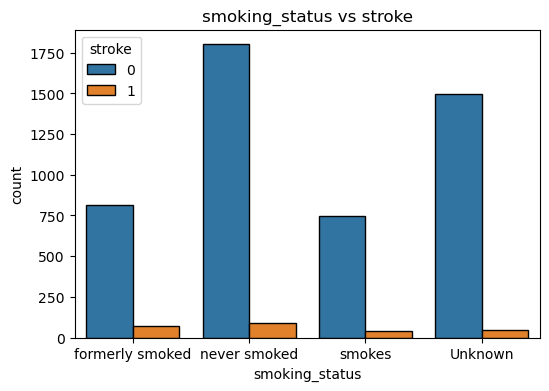

In [107]:
sns.countplot(x=df['smoking_status'],hue=df['stroke'],edgecolor='black') #people who are never smoked does not suffer from stroke
plt.title('smoking_status vs stroke')
plt.show()

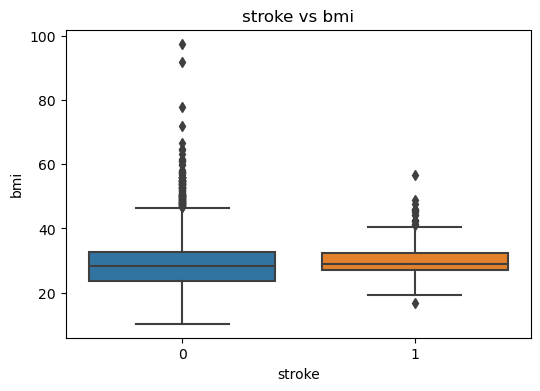

In [108]:
#stroke with bmi
sns.boxplot(x=df['stroke'],y=df['bmi'],data=df) #not much effect
plt.title('stroke vs bmi')
plt.show()

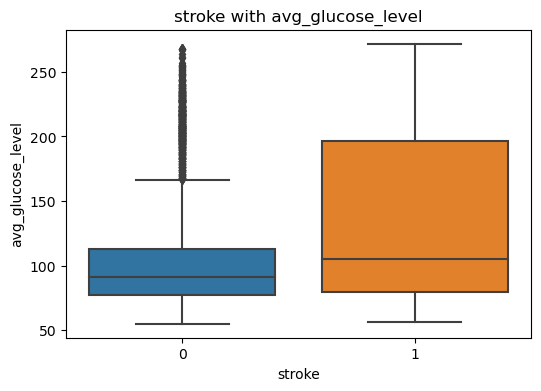

In [109]:
#stroke with avg_glucose level
sns.boxplot(x=df['stroke'],y=df['avg_glucose_level'],data=df) #people having avg glucose level ranges from 75 to 200 are more prone to stroke
plt.title('stroke with avg_glucose_level')
plt.show()

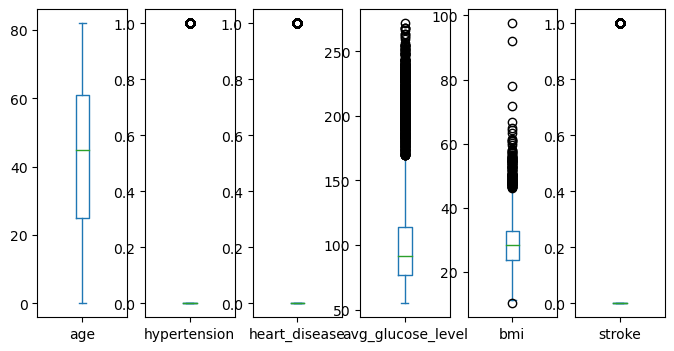

In [110]:
# box plot representation droping the outliers from feature avg_glucose_level and bmi
plt.rcParams['figure.figsize'] = (40,4)
df.plot(kind='box',subplots=True,layout=(1,29))
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13616\969278076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_glucose_level'])


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

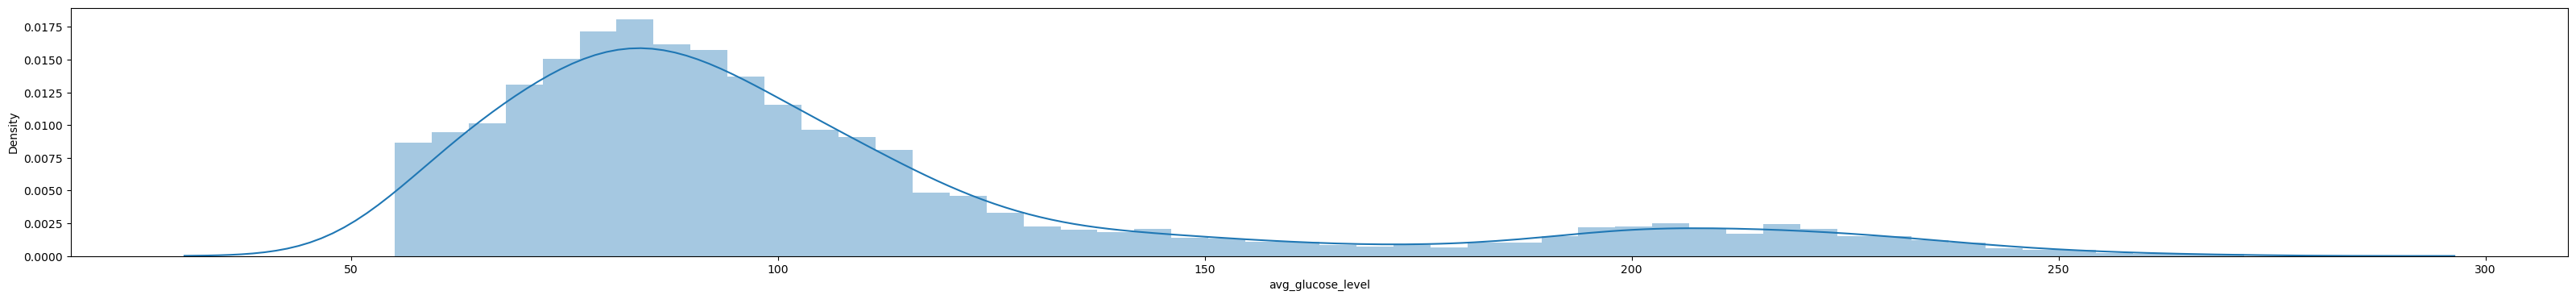

In [111]:
#we have outliers in avg_glucose_level
sns.distplot(df['avg_glucose_level'])

In [112]:
df[df['avg_glucose_level']>220]   #205 values which is around 4%, will drop these values from the entire dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
17,Male,75.0,1,0,Yes,Private,Urban,221.29,25.800000,smokes,1
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.900000,never smoked,1
22,Female,79.0,0,0,Yes,Self-employed,Urban,228.70,26.600000,never smoked,1
33,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.500000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4921,Male,72.0,0,1,Yes,Private,Rural,238.27,28.893237,smokes,0
4983,Male,76.0,1,0,Yes,Private,Rural,267.60,30.500000,never smoked,0
4986,Male,58.0,0,1,Yes,Private,Rural,225.35,26.500000,smokes,0
5034,Female,79.0,0,0,No,Private,Urban,253.86,28.800000,formerly smoked,0


In [113]:
df = df[df['avg_glucose_level']<=220]

In [114]:
df.shape

(4905, 11)

C:\Users\User\AppData\Local\Temp\ipykernel_13616\3830765081.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

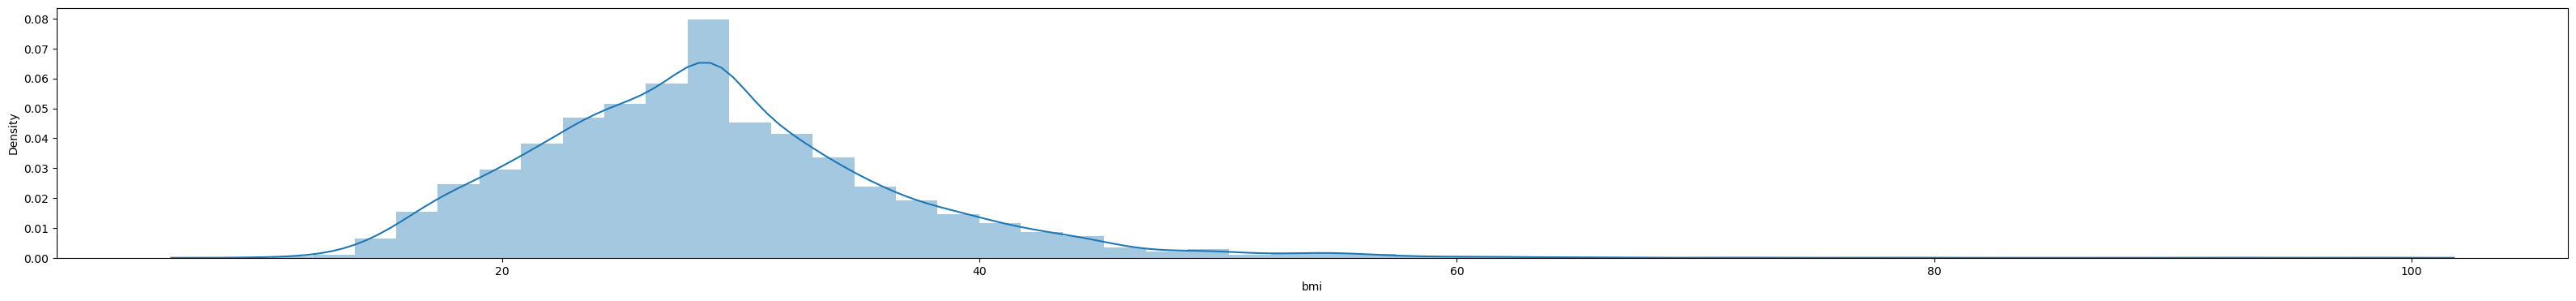

In [115]:
#we also have outliers in bmi column
sns.distplot(df['bmi'])

In [116]:
df[df['bmi']>60]          #13 values

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
358,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
466,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2764,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
2840,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0
3825,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0


In [117]:
df = df[df['bmi']<60]

In [118]:
df.shape

(4892, 11)

### target = stroke and features=10(out of which 7 are categorical and 3 are numerical)

In [119]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1].values

In [120]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked


## Categorical Encoding

In [121]:
X_new = pd.get_dummies(X,drop_first=True)

In [122]:
X_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.000000,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.000000,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.600000,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,1,0,1,0,1,0,0,0,1,0,0


In [123]:
X_new = X_new.iloc[:,:].values

In [124]:
print(X_new) #independent data
print(Y)     #dependent data

[[61.  0.  0. ...  0.  1.  0.]
 [80.  0.  1. ...  0.  1.  0.]
 [49.  0.  0. ...  0.  0.  1.]
 ...
 [35.  0.  0. ...  0.  1.  0.]
 [51.  0.  0. ...  1.  0.  0.]
 [44.  0.  0. ...  0.  0.  0.]]
[1 1 1 ... 0 0 0]


### Feature Scaling

In [125]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_New1 = mm.fit_transform(X_new)

In [126]:
X_New1

array([[0.74365234, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.97558594, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.59716797, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.42626953, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.62158203, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53613281, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### spliting the data in to training and testing data

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_New1, Y, test_size=0.3, random_state=1)

In [128]:
print(X_train.shape)      #70% of the data goes into training 
print(X_test.shape)       #30% of the goes in to testing 
print(Y_train.shape)
print(Y_test.shape)

(3424, 16)
(1468, 16)
(3424,)
(1468,)


### building the model

## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [130]:
Y_pred = lr.predict(X_test)

#### confusion matrix and classification report to check the performance

In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[1400,    0],
       [  68,    0]], dtype=int64)

In [132]:
from sklearn. metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1400
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1468
   macro avg       0.48      0.50      0.49      1468
weighted avg       0.91      0.95      0.93      1468



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### cross validation report to check over/under fitness of the model

In [63]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=5).mean()        

0.9556076322192342

In [64]:
cross_val_score(lr,X_test,Y_test,cv=5).mean()

0.9536811311555338

####   on training data accuracy = 95.5% and 
####   on testing data accuracy  = 95.3% our model is neither underfitted nor overfitted

## KNeighbors Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,weights='uniform',algorithm='auto',metric='minkowski')
knn.fit(X_train,Y_train)            #we got best value of K nearest neighbor =11 as shown below on training data

KNeighborsClassifier(n_neighbors=11)

In [76]:
Y_pred1 = knn.predict(X_test)

In [77]:
confusion_matrix(Y_test,Y_pred1)

array([[1400,    0],
       [  68,    0]], dtype=int64)

In [78]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1400
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1468
   macro avg       0.48      0.50      0.49      1468
weighted avg       0.91      0.95      0.93      1468



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
cross_val_score(knn,X_train,Y_train,cv=5).mean()

0.9553156614163145

In [80]:
cross_val_score(knn,X_test,Y_test,cv=5).mean()

0.9536811311555338

####   on training data accuracy = 95.5% and 
####   on testing data accuracy  = 95.3% our model is neither underfitted nor overfitted

In [71]:
#finding the best value of k
x= [] 
y=[]
for i in range(1,35,2):
    knn = KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='auto',metric='minkowski')
    score = cross_val_score(knn,X_train,Y_train,cv=5)
    x.append(i)
    y.append((score).mean())

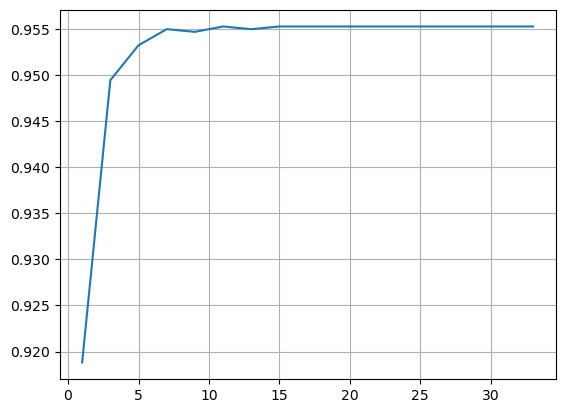

In [72]:
plt.plot(x,y)
plt.grid()
plt.show()

In [73]:
x_new= [] 
y_new=[]
for i in range(1,35,2):
    knn = KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='auto',metric='minkowski')
    score = cross_val_score(knn,X_test,Y_test,cv=5)
    x_new.append(i)
    y_new.append((score).mean())

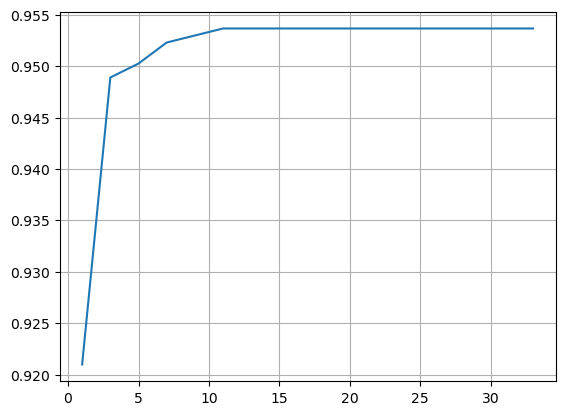

In [74]:
plt.plot(x_new,y_new)
plt.grid()
plt.show()

## Naive Bayes

In [81]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

In [82]:
Y_pred2 = mnb.predict(X_test)

In [83]:
confusion_matrix(Y_test,Y_pred2)

array([[1399,    1],
       [  68,    0]], dtype=int64)

In [84]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1400
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1468
   macro avg       0.48      0.50      0.49      1468
weighted avg       0.91      0.95      0.93      1468



In [85]:
cross_val_score(mnb,X_train,Y_train,cv=5).mean()

0.954731719810475

In [86]:
cross_val_score(mnb,X_test,Y_test,cv=5).mean()

0.9536811311555338

In [87]:
mnb.score(X_train,Y_train)

0.954731308411215

In [88]:
mnb.score(X_test,Y_test)

0.9529972752043597

####   on training data accuracy = 95.4% and 
####   on testing data accuracy  = 95.3% our model is neither underfitted nor overfitted

## Support Vector Machine(SVM) 

In [90]:
from sklearn.svm import SVC
sc = SVC()
sc.fit(X_train,Y_train)

SVC()

In [91]:
Y_pred3 = sc.predict(X_test)

In [92]:
confusion_matrix(Y_test,Y_pred3)

array([[1400,    0],
       [  68,    0]], dtype=int64)

In [93]:
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1400
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1468
   macro avg       0.48      0.50      0.49      1468
weighted avg       0.91      0.95      0.93      1468



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
cross_val_score(sc,X_train,Y_train,cv=5).mean()

0.9553156614163145

In [96]:
cross_val_score(sc,X_test,Y_test,cv=5).mean()

0.9536811311555338

In [112]:
sc.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 100,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

####   on training data accuracy = 95.5% and 
####   on testing data accuracy  = 95.3% our model is neither underfitted nor overfitted

In [98]:
#optimized value of C on training data
accuracy_score=[]
for i in range(1,26):
    sc = SVC(C=i,kernel='rbf',random_state=1)
    score= cross_val_score(sc,X_train,Y_train,cv=5)
    accuracy_score.append(score.mean())

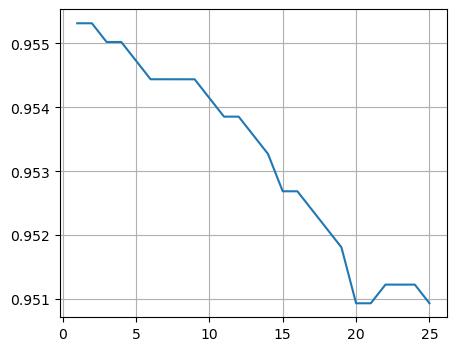

In [101]:
plt.plot(range(1,26),accuracy_score)        #c=1
plt.rcParams['figure.figsize']=(5,4)
plt.grid()
plt.show()

In [102]:
#optimized value of C on testing data
accuracy_sce=[]
for i in range(1,26):
    sc = SVC(C=i,kernel='rbf',random_state=1)
    score= cross_val_score(sc,X_test,Y_test,cv=5)
    accuracy_sce.append(score.mean())

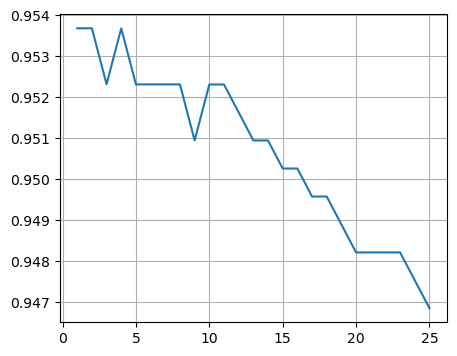

In [104]:
plt.plot(range(1,26),accuracy_sce)      #c=2
plt.grid()
plt.show()

In [105]:
#optimized value of C
accuracy_score=[]
for i in list(np.arange(0.1,5,0.1)):
    sc = SVC(C=i,kernel='rbf',random_state=1)
    score= cross_val_score(sc,X_train,Y_train,cv=5)
    accuracy_score.append(score.mean())

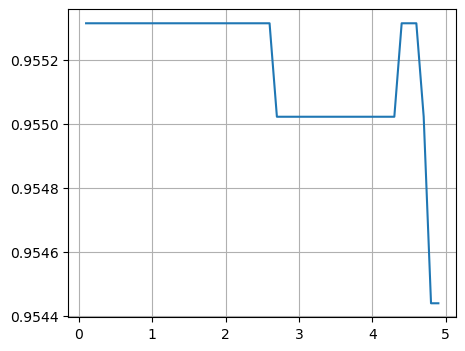

In [107]:
plt.plot(list(np.arange(0.1,5,0.1)),accuracy_score)     #c=0-2.5 and 4.5
plt.grid()
plt.show()

In [108]:
#optimized value of C
gama = [0.001,0.01,0.1,1,10,100]
g_score= []
for i in gama:
    sc = SVC(C=1,kernel='rbf',random_state=1,gamma=i)
    score= cross_val_score(sc,X_train,Y_train,cv=5)
    g_score.append(score.mean())

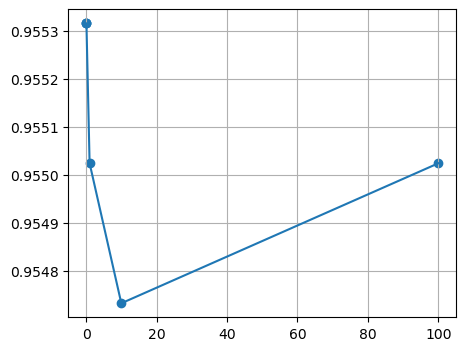

In [110]:
plt.plot(gama,g_score)                 #c=0
plt.scatter(gama,g_score)
plt.grid()
plt.show()

## Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state=1,ccp_alpha=0.0)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [114]:
Y_pred4 = dt.predict(X_test)

In [115]:
print(classification_report(Y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1400
           1       0.17      0.21      0.19        68

    accuracy                           0.92      1468
   macro avg       0.57      0.58      0.57      1468
weighted avg       0.92      0.92      0.92      1468



In [116]:
dt.score(X_train,Y_train)

1.0

In [117]:
dt.score(X_test,Y_test)

0.917574931880109

[Text(0.45749713302752293, 0.9722222222222222, 'x[0] <= 0.689\ngini = 0.085\nsamples = 3424\nvalue = [3271, 153]'),
 Text(0.17259174311926606, 0.9166666666666666, 'x[0] <= 0.591\ngini = 0.027\nsamples = 2414\nvalue = [2381, 33]'),
 Text(0.06393348623853211, 0.8611111111111112, 'x[0] <= 0.457\ngini = 0.014\nsamples = 1966\nvalue = [1952, 14]'),
 Text(0.020642201834862386, 0.8055555555555556, 'x[3] <= 0.017\ngini = 0.004\nsamples = 1384\nvalue = [1381, 3]'),
 Text(0.009174311926605505, 0.75, 'x[3] <= 0.017\ngini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(0.0045871559633027525, 0.6944444444444444, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.013761467889908258, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03211009174311927, 0.75, 'x[0] <= 0.016\ngini = 0.003\nsamples = 1344\nvalue = [1342, 2]'),
 Text(0.022935779816513763, 0.6944444444444444, 'x[4] <= 0.332\ngini = 0.038\nsamples = 52\nvalue = [51, 1]'),
 Text(0.01834862385321101, 0.638888888888888

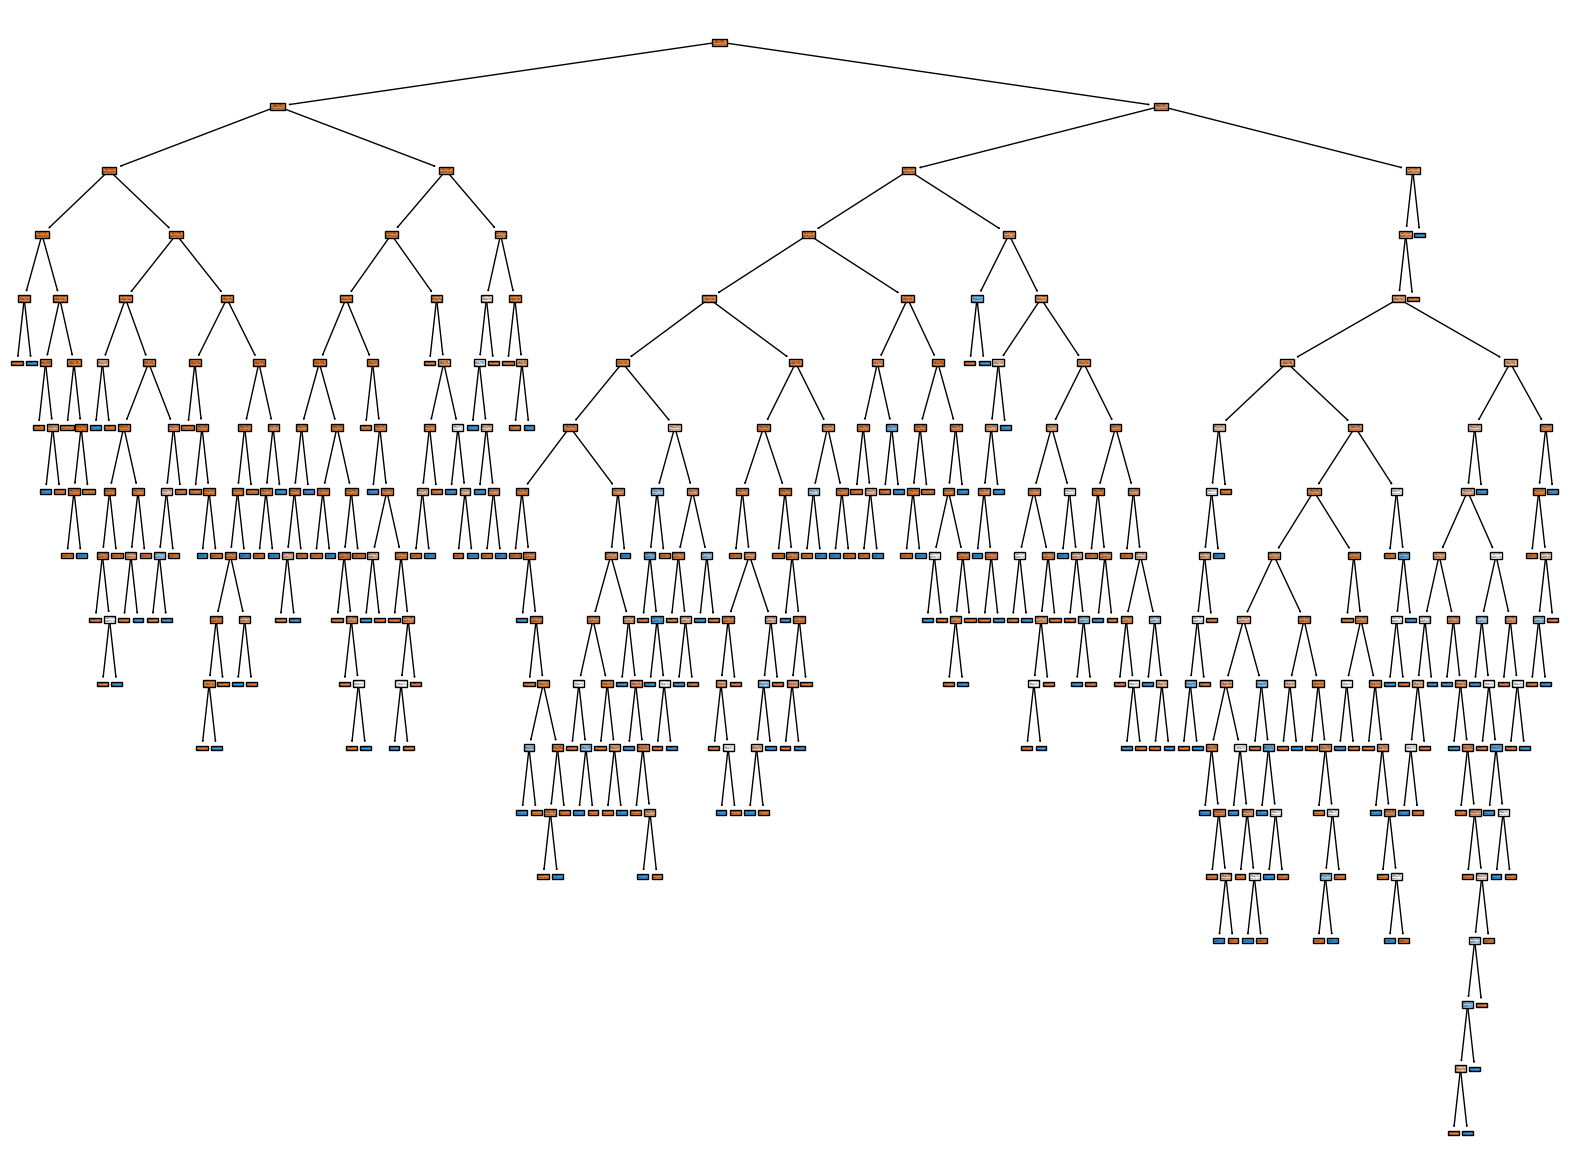

In [120]:
#Pruning
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(dt,filled=True)

In [121]:
data = dt.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas,impurities=data.ccp_alphas,data.impurities

In [122]:
ccp_alphas

array([0.        , 0.0001454 , 0.0001808 , 0.00019042, 0.00019405,
       0.00019441, 0.00023364, 0.00023364, 0.00023364, 0.00023364,
       0.00023802, 0.00024338, 0.00024338, 0.00025555, 0.00026141,
       0.00026772, 0.00026772, 0.00027191, 0.0002738 , 0.00027488,
       0.00027708, 0.00027878, 0.00027878, 0.00027989, 0.00028293,
       0.00028293, 0.00028394, 0.0002859 , 0.00029042, 0.00029206,
       0.00029206, 0.00029206, 0.00029716, 0.00029936, 0.00031161,
       0.00031848, 0.00032451, 0.00032922, 0.00034769, 0.00035047,
       0.00036109, 0.00036345, 0.00036728, 0.00037176, 0.00037371,
       0.00038941, 0.00039752, 0.00040888, 0.00041131, 0.0004207 ,
       0.00043081, 0.00043808, 0.00043808, 0.00046175, 0.00046729,
       0.00047702, 0.00048338, 0.00048676, 0.00048867, 0.00049425,
       0.0005053 , 0.00050807, 0.00051022, 0.00052143, 0.00053803,
       0.00057821, 0.0005951 , 0.00060067, 0.00060991, 0.00066959,
       0.00069944, 0.00077237, 0.00109749, 0.00136372, 0.00459

In [123]:
treee = []
for i in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=1,ccp_alpha=i)
    dt.fit(X_train,Y_train)
    treee.append(dt)
print("number of nodes in the last tree",treee[-1].tree_.node_count)
print(" the value of ccpalpha is ",ccp_alphas[-1])

number of nodes in the last tree 1
 the value of ccpalpha is  0.004598016100425151


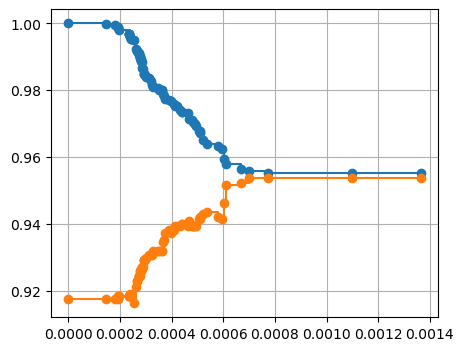

In [124]:
fig,ax=plt.subplots()

accuracy = []
acc_test = []

for i in treee:
    accuracy.append(i.score(X_train,Y_train))

for i in treee:
    acc_test.append(i.score(X_test,Y_test))
plt.grid()
ax.plot(ccp_alphas[:-1], accuracy[:-1], marker="o", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], acc_test[:-1], marker="o", drawstyle="steps-post")

In [ ]:
#final model with ccpalpha value of 0.00008

In [125]:
dt_final = DecisionTreeClassifier(random_state=1,ccp_alpha=0.0008)
dt_final.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0008, random_state=1)

In [126]:
Y_pred5 = dt_final.predict(X_test)

In [127]:
print(classification_report(Y_test,Y_pred5))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1400
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1468
   macro avg       0.48      0.50      0.49      1468
weighted avg       0.91      0.95      0.93      1468



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.4, 0.875, 'x[0] <= 0.689\ngini = 0.085\nsamples = 3424\nvalue = [3271, 153]'),
 Text(0.2, 0.625, 'gini = 0.027\nsamples = 2414\nvalue = [2381, 33]'),
 Text(0.6, 0.625, 'x[0] <= 0.921\ngini = 0.209\nsamples = 1010\nvalue = [890, 120]'),
 Text(0.4, 0.375, 'x[3] <= 0.817\ngini = 0.161\nsamples = 723\nvalue = [659, 64]'),
 Text(0.2, 0.125, 'gini = 0.126\nsamples = 620\nvalue = [578, 42]'),
 Text(0.6, 0.125, 'gini = 0.336\nsamples = 103\nvalue = [81, 22]'),
 Text(0.8, 0.375, 'gini = 0.314\nsamples = 287\nvalue = [231, 56]')]

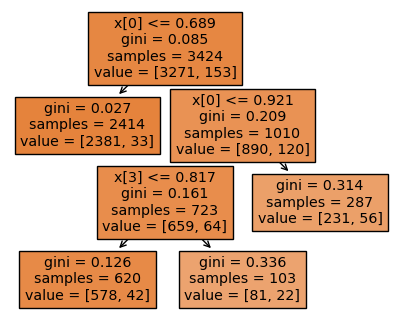

In [128]:
from sklearn import tree
tree.plot_tree(dt_final,filled=True)

In [129]:
dt_final.score(X_train,Y_train)

0.9553154205607477

In [130]:
dt_final.score(X_test,Y_test)

0.9536784741144414

####   on training data accuracy = 95.5% and 
####   on testing data accuracy  = 95.3% our model is neither underfitted nor overfitted

## Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 20)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20)

In [132]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [134]:
Y_pred6 = rf.predict(X_test)

In [135]:
print(classification_report(Y_test,Y_pred6))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1400
           1       0.14      0.01      0.03        68

    accuracy                           0.95      1468
   macro avg       0.55      0.51      0.50      1468
weighted avg       0.92      0.95      0.93      1468



In [136]:
rf.score(X_train,Y_train)

0.9964953271028038

In [137]:
rf.score(X_test,Y_test)

0.9502724795640327

In [139]:
print(cross_val_score(rf,X_train,Y_train).mean())

0.9526857899005421


In [140]:
print(cross_val_score(rf,X_test,Y_test).mean())

0.9509600427201598


####   on training data accuracy = 95.2% and 
####   on testing data accuracy  = 95% our model is neither underfitted nor overfitted

### conclusion: from all the models we are getting an accuracy around 95% on both training an testing data